In [23]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
 
CHUNK = 4096 # number of data points to read at a time
RATE = 44100 # time resolution of the recording device (Hz)
#DEVICE = 0 # default
 
p = pyaudio.PyAudio()
 
stream=p.open(format=pyaudio.paInt16,
              channels=2,
              rate=RATE,
              input=True,
              frames_per_buffer=CHUNK)

to_plot = []
 
while True:
    indata = np.fromstring(stream.read(CHUNK),dtype=np.int16)
 
    # Take the fft and square each value
    fftData=abs(np.fft.rfft(indata))**2
    # find the maximum
    to_plot.append(fftData)
    which = fftData[1:].argmax() + 1
    # use quadratic interpolation around the max
    print(fftData)

C:\Users\GODOVO~1\AppData\Local\Temp/ipykernel_10320/416295978.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  indata = np.fromstring(stream.read(CHUNK),dtype=np.int16)


[1.33518025e+10 1.40447053e+10 3.56337692e+10 ... 1.25958933e+04
 3.36640784e+03 1.76400000e+03]
[2.86332010e+09 8.82929866e+10 1.45272871e+11 ... 6.21093763e+04
 1.21867414e+04 4.84000000e+02]
[3.54351135e+11 8.34406649e+10 4.43520449e+11 ... 2.48670908e+05
 1.59724409e+04 3.60000000e+01]
[3.02423005e+09 3.68627727e+09 1.04530506e+10 ... 9.18874690e+03
 7.58531745e+03 1.08900000e+03]
[4.17221476e+08 3.03305277e+08 1.36606977e+09 ... 1.57386231e+02
 8.98234773e+02 1.96000000e+02]
[1.32054472e+11 7.49940197e+10 7.18077457e+10 ... 6.49362899e+04
 2.36703165e+04 7.29000000e+02]
[5.66459040e+10 8.03436416e+09 3.34542812e+11 ... 2.22127944e+05
 4.45414598e+03 1.60000000e+01]
[1.98122912e+09 3.10976995e+09 3.80943955e+10 ... 1.47629775e+04
 5.48779406e+03 2.25000000e+02]
[2.03049372e+09 3.00543215e+09 7.43540668e+09 ... 1.01891545e+02
 8.36818787e+02 1.08900000e+03]
[2.06224974e+09 4.98368717e+08 8.41475363e+08 ... 7.77278149e+02
 1.20707379e+03 6.76000000e+02]
[5.11267901e+09 5.31061643e+09

KeyboardInterrupt: 

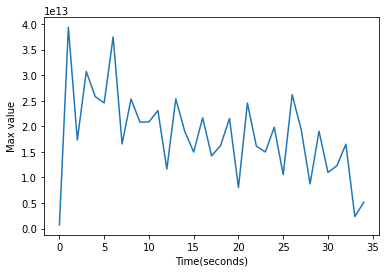

In [25]:
plt.xlabel('Time(seconds)')
plt.ylabel('Max value')

plt.plot([max(x) for x in to_plot])

In [ ]:
if which != len(fftData)-1:
        y0,y1,y2 = np.log(fftData[which-1:which+2:])
        x1 = (y2 - y0) * .5 / (2 * y1 - y2 - y0)
        # find the frequency and output it
        thefreq = (which+x1)*RATE/CHUNK
        print("The freq is %f Hz." % (thefreq))
    else:
        thefreq = which*RATE/CHUNK
        print("The freq is %f Hz." % (thefreq))